In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn import metrics, preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC 
from sklearn.tree import DecisionTreeClassifier
from sklearn.grid_search import GridSearchCV
from sklearn.svm import SVC 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import train_test_split


import seaborn as sns
sns.set()

from packages.data_2017q2 import get_bike_data
from packages.daylight import hours_of_daylight
from packages.confusion_matrix import plot_confusion_matrix

/Users/brandonkalnasy/miniconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/brandonkalnasy/miniconda3/lib/python3.6/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [5]:
data = get_bike_data()

#formatting
data['start_station_id'] = data['start_station_id'].astype(str).astype(int)

#dropping the 'One Day Pass' riders since there are only a few riders of that type in the whole dataset
data = data[data['passholder_type'] != 'One Day Pass']

#creates date and hour columns
ind = pd.DatetimeIndex(data.start_time)
data['date'] = ind.date.astype('datetime64')
data['hour'] = ind.hour

In [6]:
#creating a dataset with the start_time as the index to use later
indexed_data = data.set_index('start_time', drop = False)
indexed_data['day_of_week'] = indexed_data.index.dayofweek

In [63]:
#creates pivot table with date and rider type
by_duration = data.pivot_table('trip_id', aggfunc='count',
                            index='duration',
                            columns='passholder_type')
by_duration.head()

passholder_type,Indego30,IndegoFlex,Walk-up
duration,,,
1,2479.0,23.0,349.0
2,1871.0,9.0,84.0
3,4109.0,12.0,122.0
4,7590.0,35.0,247.0
5,10142.0,49.0,427.0


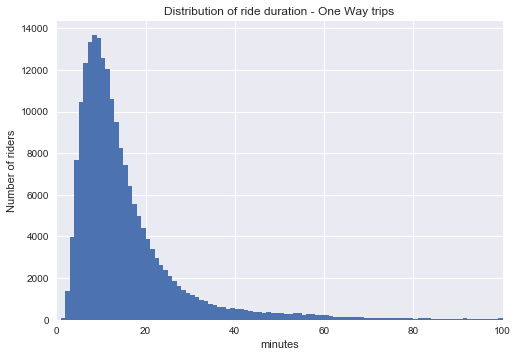

In [82]:
plt.hist(data[data['trip_route_category'] == 'One Way']['duration'], bins = np.arange(101))
plt.xlim(0,100)
plt.title('Distribution of ride duration - One Way trips')
plt.xlabel('minutes')
plt.ylabel('Number of riders');

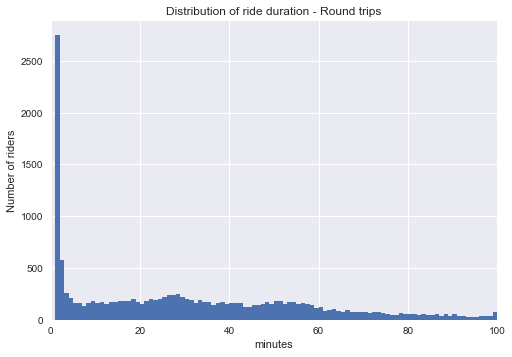

In [83]:
plt.hist(data[data['trip_route_category'] == 'Round Trip']['duration'], bins = np.arange(101))
plt.xlim(0,100)
plt.title('Distribution of ride duration - Round trips')
plt.xlabel('minutes')
plt.ylabel('Number of riders');

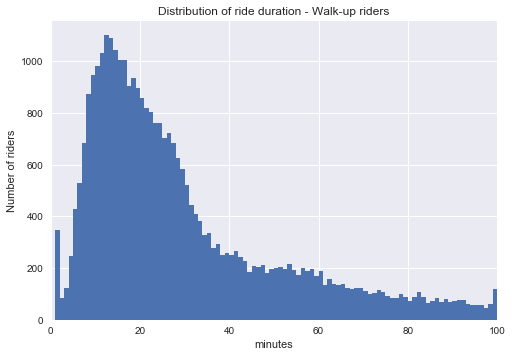

In [84]:
plt.hist(data[data['passholder_type'] == 'Walk-up']['duration'], bins = np.arange(101))
plt.xlim(0,100)
plt.title('Distribution of ride duration - Walk-up riders')
plt.xlabel('minutes')
plt.ylabel('Number of riders');

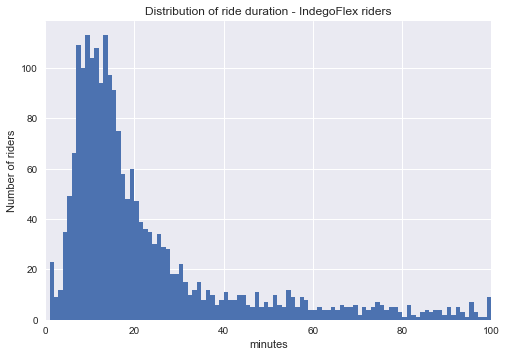

In [85]:
plt.hist(data[data['passholder_type'] == 'IndegoFlex']['duration'], bins = np.arange(101))
plt.xlim(0,100)
plt.title('Distribution of ride duration - IndegoFlex riders')
plt.xlabel('minutes')
plt.ylabel('Number of riders');

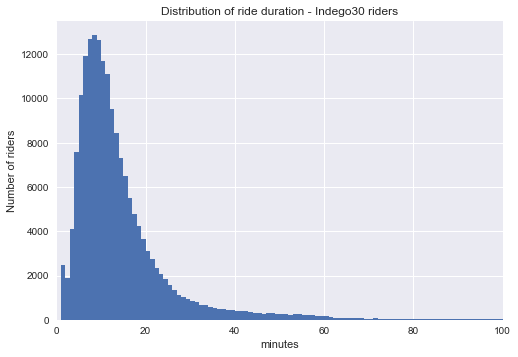

In [86]:
plt.hist(data[data['passholder_type'] == 'Indego30']['duration'], bins = np.arange(101))
plt.xlim(0,100)
plt.title('Distribution of ride duration - Indego30 riders')
plt.xlabel('minutes')
plt.ylabel('Number of riders');

In [12]:
#given the small amount of round trips and a large % of those being 1 min, I am only going to look at one way trip
one_way_trips = indexed_data[indexed_data['trip_route_category'] == 'One Way']


In [100]:

#only going to use indego30 riders to predict
sample_data = one_way_trips[(one_way_trips['passholder_type'] == 'Indego30') & (one_way_trips['duration'] < 30)]

X = sample_data[['start_station_id','end_station_id']]
X = X.values

y = sample_data.duration
y = y.values

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)

0.482099327431
0.401347902889
22.2476575903


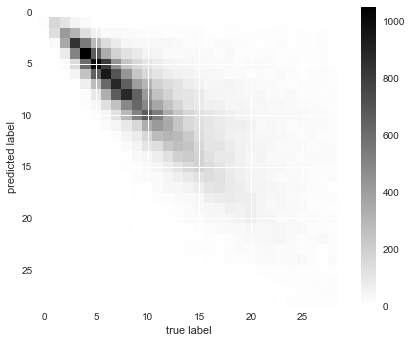

In [101]:
clf = DecisionTreeClassifier().fit(Xtrain, ytrain)
ypred_dt = clf.predict(Xtest)

plt.figure()
plt.imshow(metrics.confusion_matrix(ypred_dt, ytest),
           interpolation='nearest', cmap=plt.cm.binary)
plt.colorbar()
plt.xlabel("true label")
plt.ylabel("predicted label")

print(metrics.explained_variance_score(ytest, ypred_dt))
print(metrics.r2_score(ytest, ypred_dt))
print(metrics.mean_squared_error(ytest, ypred_dt))

0.52696974368
0.487146953301
17.293928838


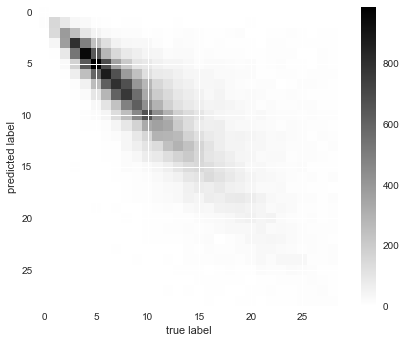

In [91]:
clf = RandomForestClassifier(n_estimators = 50).fit(Xtrain, ytrain)
ypred_rf = clf.predict(Xtest)

plt.figure()
plt.imshow(metrics.confusion_matrix(ypred_rf, ytest),
           interpolation='nearest', cmap=plt.cm.binary)
plt.colorbar()
plt.xlabel("true label")
plt.ylabel("predicted label")

print(metrics.explained_variance_score(ytest, ypred_rf))
print(metrics.r2_score(ytest, ypred_rf))
print(metrics.mean_squared_error(ytest, ypred_rf))

In [99]:
print(metrics.classification_report(ytest, ypred_dt))

             precision    recall  f1-score   support

          1       0.26      0.41      0.32        17
          2       0.41      0.47      0.44       340
          3       0.34      0.41      0.38       981
          4       0.34      0.43      0.38      1886
          5       0.30      0.37      0.33      2569
          6       0.27      0.34      0.30      2941
          7       0.24      0.29      0.26      3097
          8       0.21      0.25      0.23      3117
          9       0.22      0.24      0.23      3144
         10       0.21      0.21      0.21      2907
         11       0.22      0.25      0.23      2746
         12       0.18      0.17      0.17      2299
         13       0.16      0.14      0.15      2080
         14       0.17      0.15      0.16      1813
         15       0.16      0.14      0.15      1636
         16       0.13      0.10      0.12      1314
         17       0.16      0.12      0.14      1130
         18       0.13      0.08      0.09   

In [20]:
print(metrics.classification_report(ytest, ypred_rf))

             precision    recall  f1-score   support

          1       0.32      0.35      0.33        17
          2       0.41      0.42      0.41       259
          3       0.38      0.41      0.39       748
          4       0.34      0.41      0.37      1490
          5       0.31      0.42      0.35      2062
          6       0.29      0.34      0.31      2428
          7       0.27      0.31      0.28      2615
          8       0.24      0.25      0.25      2677
          9       0.23      0.25      0.24      2668
         10       0.21      0.22      0.21      2370
         11       0.21      0.26      0.23      2201
         12       0.20      0.17      0.19      1971
         13       0.18      0.15      0.16      1767
         14       0.16      0.15      0.16      1449
         15       0.16      0.14      0.15      1322
         16       0.16      0.11      0.13      1138
         17       0.14      0.11      0.12       939
         18       0.13      0.10      0.11   

In [32]:
sample_data = one_way_trips[one_way_trips['passholder_type'] != 'IndegoFlex']

class_names = sample_data.passholder_type.unique()

X = sample_data[['day_of_week','duration','hour']]
X = X.values

y = sample_data.passholder_type
y = y.values
lb = preprocessing.LabelBinarizer()
y = lb.fit_transform(y)
c, r = y.shape
y = y.reshape(c,)


Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)

best parameter choice: {'n_neighbors': 8}


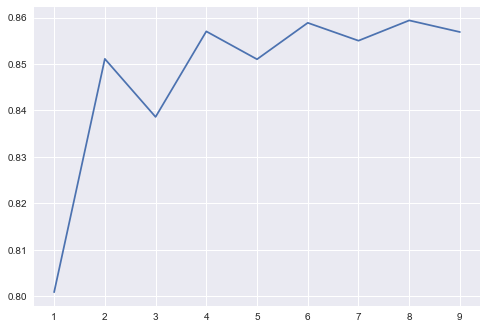

In [39]:
knn = KNeighborsClassifier()
knn.fit(Xtrain, ytrain)
ypred = knn.predict(Xtest)

# Use GridSearchCV to find the best accuracy given choice of ``n_neighbors``
n_neighbors = np.arange(1, 10)
grid = GridSearchCV(knn, param_grid={'n_neighbors': n_neighbors}, cv=5)
grid.fit(X, y)
print ("best parameter choice:", grid.best_params_)

# Plot the accuracy as a function of the number of neighbors.
# Does this change significantly if you use more/fewer folds?
scores = [g[1] for g in grid.grid_scores_]
plt.plot(n_neighbors, scores);

Confusion matrix, without normalization
[[42323  1004]
 [ 5789  1246]]
Normalized confusion matrix
[[ 0.98  0.02]
 [ 0.82  0.18]]


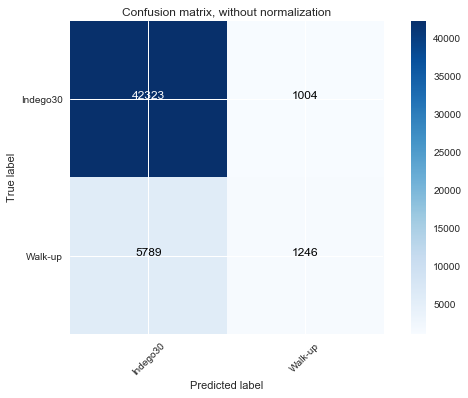

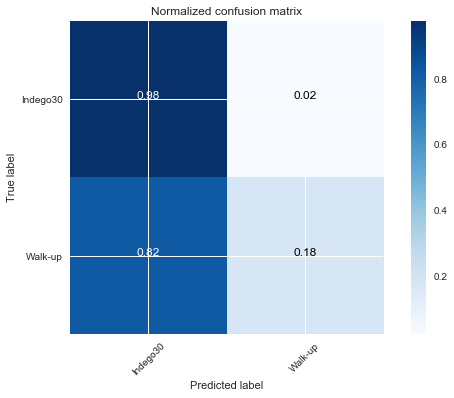

In [40]:
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(Xtrain, ytrain)
ypred = knn.predict(Xtest)

# Compute confusion matrix
cnf_matrix = metrics.confusion_matrix(ytest, ypred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [41]:
print(knn.score(Xtest, ytest))
print(metrics.classification_report(ytest, ypred))

0.865116556134
             precision    recall  f1-score   support

          0       0.88      0.98      0.93     43327
          1       0.55      0.18      0.27      7035

avg / total       0.83      0.87      0.83     50362



In [42]:
sample_data = one_way_trips[one_way_trips['passholder_type'] != 'IndegoFlex'].sample(frac = 0.05, random_state = 0)

class_names = sample_data.passholder_type.unique()

X = sample_data[['day_of_week','duration','hour']]
X = X.values

y = sample_data.passholder_type
y = y.values
lb = preprocessing.LabelBinarizer()
y = lb.fit_transform(y)
c, r = y.shape
y = y.reshape(c,)


Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)




In [43]:
clf = SVC(kernel = 'rbf').fit(Xtrain, ytrain)


gamma_range = np.logspace(-2, 2, 5)
Crange = np.logspace(-2, 2, 5)

grid = GridSearchCV(clf, param_grid={'gamma': gamma_range, 'C': Crange}, cv=5)
grid.fit(X, y)

print ("best parameter choice:", grid.best_params_)

best parameter choice: {'C': 1.0, 'gamma': 0.01}


In [48]:
clf = SVC(kernel = 'rbf', C = 1, gamma = .01).fit(Xtrain, ytrain)
ypred_rbf = clf.predict(Xtest)
print("SVC: kernel = {0}".format('rbf'))

print(clf.score(Xtest, ytest))

SVC: kernel = rbf
0.863780778396


Confusion matrix, without normalization
[[2135   19]
 [ 332   32]]
Normalized confusion matrix
[[ 0.99  0.01]
 [ 0.91  0.09]]


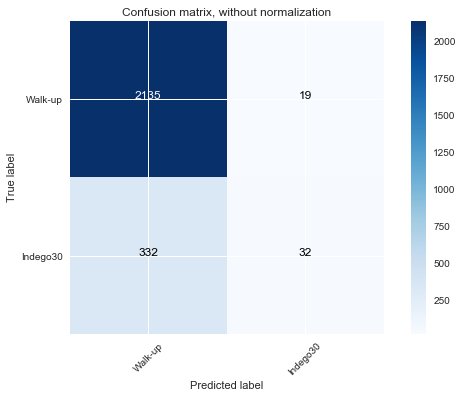

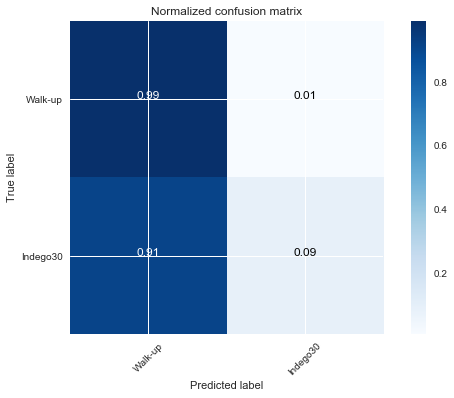

In [47]:
cnf_matrix = metrics.confusion_matrix(ytest, ypred_rbf)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [51]:
print(metrics.classification_report(ytest, ypred_rbf))

             precision    recall  f1-score   support

          0       0.87      0.99      0.93      2154
          1       0.74      0.09      0.16       364

avg / total       0.85      0.86      0.81      2518

